In [74]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('lead_gen.csv')

In [3]:
df.head()

,source,returning,mobile,country,pages_viewed,lead
0,Taboola,1,1,US,2,0
1,Taboola,0,1,US,6,0
2,Facebook,0,0,US,2,0
3,Taboola,0,0,US,5,0
4,Taboola,0,0,Canada,5,0


In [7]:
df.isnull().sum()

source          0
returning       0
mobile          0
country         0
pages_viewed    0
lead            0
dtype: int64

In [ ]:
## Exploratory

In [8]:
df.shape

(287742, 6)

In [9]:
df.dtypes

source          object
returning        int64
mobile           int64
country         object
pages_viewed     int64
lead             int64
dtype: object

In [10]:
df.head()

,source,returning,mobile,country,pages_viewed,lead
0,Taboola,1,1,US,2,0
1,Taboola,0,1,US,6,0
2,Facebook,0,0,US,2,0
3,Taboola,0,0,US,5,0
4,Taboola,0,0,Canada,5,0


In [11]:
df.describe()

,returning,mobile,pages_viewed,lead
count,287742.000000,287742.000000,287742.000000,287742.000000
mean,0.173607,0.685851,4.917666,0.032140
std,0.378772,0.464177,3.382546,0.176372
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.000000,4.000000,0.000000
75%,0.000000,1.000000,7.000000,0.000000
max,1.000000,1.000000,30.000000,1.000000


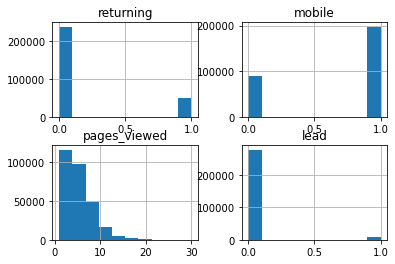

In [12]:
df.hist()
plt.show()

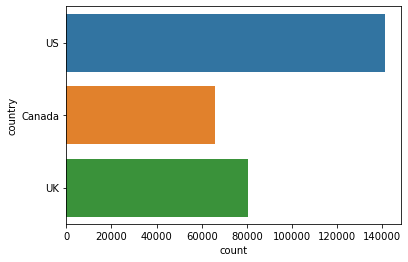

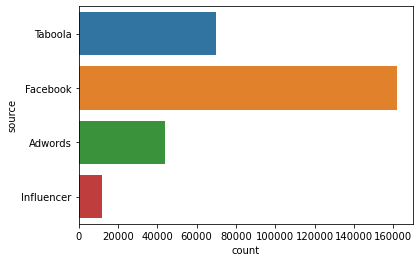

In [13]:
sns.countplot(y='country',data=df)
plt.show()
sns.countplot(y='source',data=df)
plt.show()

- We have 290k observations and 6 features

- We have 2 categorical features and 4 numeric ones

- 3 of the numeric features are actually indicator variable 

- one of the indicator variables is actually the target variable

- Don't have missing data

- The overall conversion rate was 3.2% 

- Most of the visitors live in the US

- Most of the visitors came from Facebook ads

In [21]:
def conversion_rate(segment):
    fig,(ax1,ax2)=plt.subplots(ncols=2,sharey=False,figsize=(14,6))
    sns.countplot(x=segment,data=df,ax=ax1)
    sns.barplot(x=segment,y='lead',data=df,ax=ax2)
    plt.title('Conversion Rate by {}'.format(segment.capitalize()))
    plt.show()

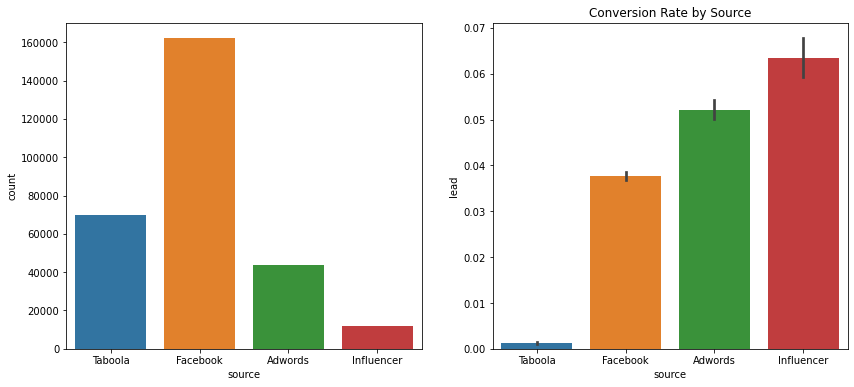

In [22]:
conversion_rate(segment='source')

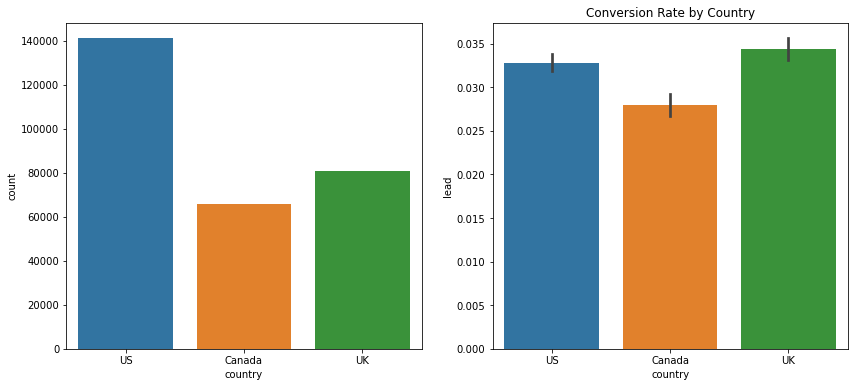

In [23]:
conversion_rate(segment='country')

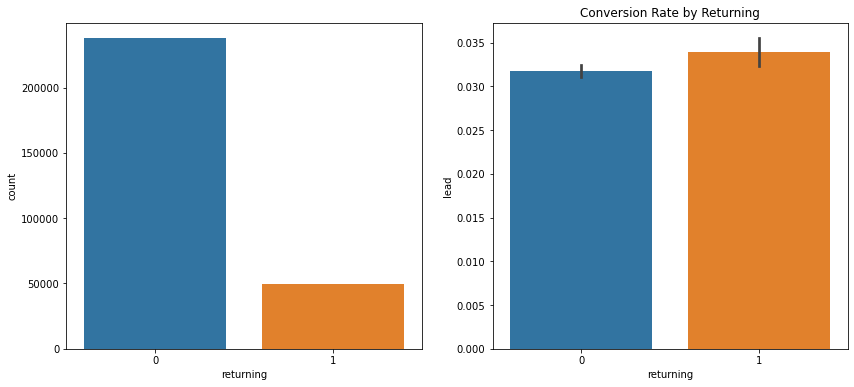

In [25]:
conversion_rate(segment='returning')

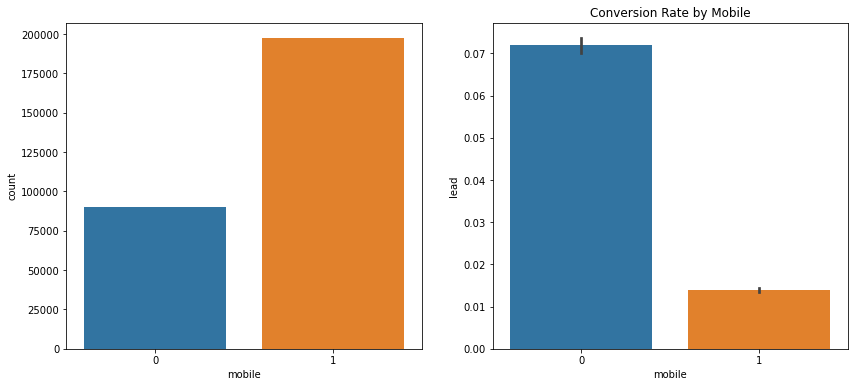

In [26]:
conversion_rate(segment='mobile')

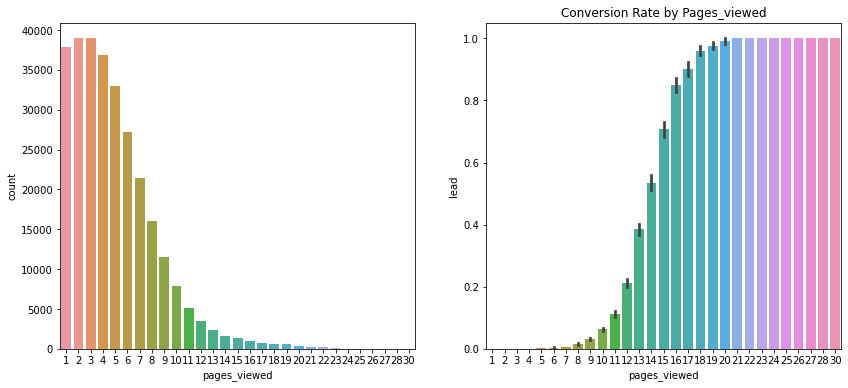

In [28]:
conversion_rate(segment='pages_viewed')

In [27]:
df.columns

Index(['source', 'returning', 'mobile', 'country', 'pages_viewed', 'lead'], dtype='object')

- Those who viewed pages_viewed pages more are lead

- Though most of them viewed via mobile but more lead is from peoplw who viewed via desktop.

- The who returned to page is converted in to lead

- conversion rate from taboola is very low

In [38]:
d1=df.loc[df['country']=='Canada']

In [41]:
df['lead'].value_counts()

0    278494
1      9248
Name: lead, dtype: int64

<AxesSubplot:xlabel='source', ylabel='count'>

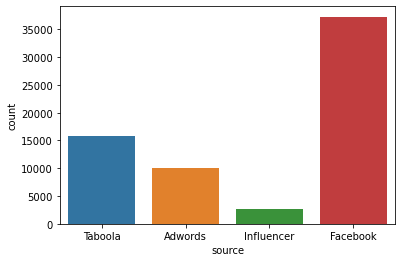

In [35]:
sns.countplot(x='source',data=d1)

In [ ]:
## Modelling

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import partial_dependence
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score,make_scorer,confusion_matrix

In [72]:
def model_performance(y_test, model):    
    rf_cm_te = confusion_matrix(y_test,model)
    print(rf_cm_te)
    print("Precision:",precision_score(y_test,model))
    print("Recall",recall_score(y_test,model))
    print("Fl-Score",f1_score(y_test,model))
    print("ROC_AUC",roc_auc_score(y_test,y_pred))
    
    print('---------------------Test---------------------')
    print(classification_report(y_test,model))
    
    #Confusion Matrix
    
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(rf_cm_te), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Test Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    

In [45]:
dataset=pd.get_dummies(df)
dataset.head()

,returning,mobile,pages_viewed,lead,source_Adwords,source_Facebook,source_Influencer,source_Taboola,country_Canada,country_UK,country_US
0,1,1,2,0,0,0,0,1,0,0,1
1,0,1,6,0,0,0,0,1,0,0,1
2,0,0,2,0,0,1,0,0,0,0,1
3,0,0,5,0,0,0,0,1,0,0,1
4,0,0,5,0,0,0,0,1,1,0,0


In [56]:
y=dataset.lead
X=dataset.drop('lead',axis=1)

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

## Logistic Regression

[[55462   224]
 [  632  1231]]
Precision: 0.8460481099656357
Recall 0.6607622114868492
Fl-Score 0.7420132610006028
ROC_AUC 0.8283698282230424
---------------------Test---------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     55686
           1       0.85      0.66      0.74      1863

    accuracy                           0.99     57549
   macro avg       0.92      0.83      0.87     57549
weighted avg       0.98      0.99      0.98     57549



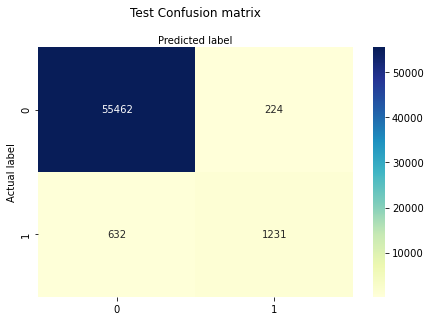

In [75]:
logreg2 = LogisticRegression(solver = 'lbfgs')

# fit the model with data
logreg2.fit(X_train,y_train.values.ravel())

#
y_pred=logreg2.predict(X_test)

model_performance(y_test,y_pred)

## Decision Tree

[[55472   214]
 [  671  1192]]
Precision: 0.8477951635846372
Recall 0.6398282340311325
Fl-Score 0.7292750076475986
ROC_AUC 0.8283698282230424
---------------------Test---------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     55686
           1       0.85      0.64      0.73      1863

    accuracy                           0.98     57549
   macro avg       0.92      0.82      0.86     57549
weighted avg       0.98      0.98      0.98     57549



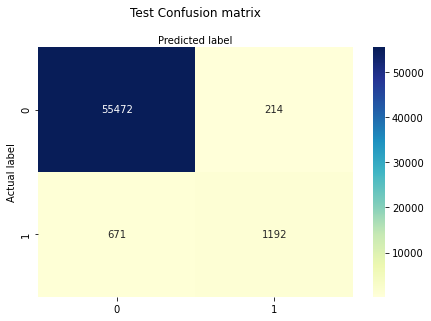

In [76]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree_p=tree.predict(X_test)
model_performance(y_test,tree_p)

## Random Forest

[[55470   216]
 [  664  1199]]
Precision: 0.8473498233215547
Recall 0.6435856146001073
Fl-Score 0.7315436241610738
ROC_AUC 0.8283698282230424
---------------------Test---------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     55686
           1       0.85      0.64      0.73      1863

    accuracy                           0.98     57549
   macro avg       0.92      0.82      0.86     57549
weighted avg       0.98      0.98      0.98     57549



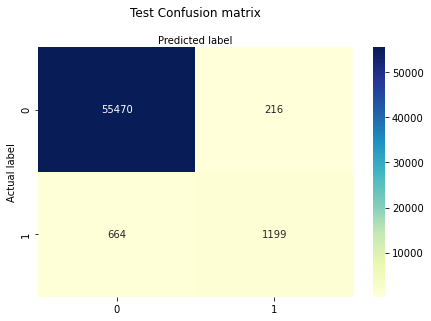

In [77]:
rf = RandomForestClassifier(n_estimators=100) 
rf.fit(X_train,y_train)
rf_preds= rf.predict(X_test)
model_performance(y_test,rf_preds)

## Gradient Boosting

In [59]:
gbm=GradientBoostingClassifier()
gbm.fit(X_train,y_train)


GradientBoostingClassifier()

In [78]:
#pred=gbm.predict_proba(X_test)
pred=gbm.predict(X_test)
#pred=[p[1] for p in pred]


[[55466   220]
 [  640  1223]]
Precision: 0.8475398475398476
Recall 0.6564680622651637
Fl-Score 0.7398669086509376
ROC_AUC 0.8283698282230424
---------------------Test---------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     55686
           1       0.85      0.66      0.74      1863

    accuracy                           0.99     57549
   macro avg       0.92      0.83      0.87     57549
weighted avg       0.98      0.99      0.98     57549



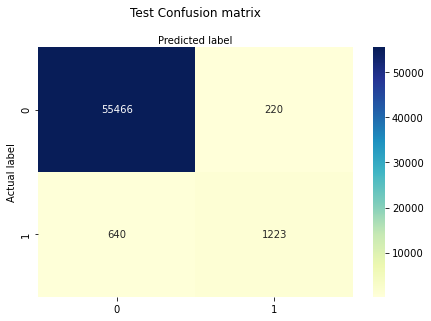

In [79]:
model_performance(y_test,pred)